In [25]:
from matplotlib import pyplot as plt
import numpy as np 
import torch

In [138]:
plt.style.use(['dark_background'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(10,10), dpi=100)
plt.set_cmap('YlOrRd')
π = torch.pi



<Figure size 1000x1000 with 0 Axes>

## Visualizing Data

In [139]:
def plot_dots_w_lables(ax, d, l):
    ax.scatter(d[:, 0], d[:, 1], c=l, s=40)

    ax.axhline(0, color='white', linewidth=0.5)  # X-axis
    ax.axvline(0, color='white', linewidth=0.5)  # Y-axis

    plot_box_size = 2
    ax.set_xlim(left=-plot_box_size, right=plot_box_size)
    ax.set_ylim(bottom=-plot_box_size, top=plot_box_size)



In [140]:
# making the dots
dot_counts = 100
d = torch.randn(dot_counts, 2) / 2  # dot_counts number of 2d points, scale down to limit max distance to 1
l = torch.zeros(dot_counts)  # label for dots

# dividing data into 4 quadrants
l[d[:,0] < 0] = 1   
l[d[:,1] < 0] = 2
l[(d[:,0] > 0) & (d[:,1] < 0)] = 3

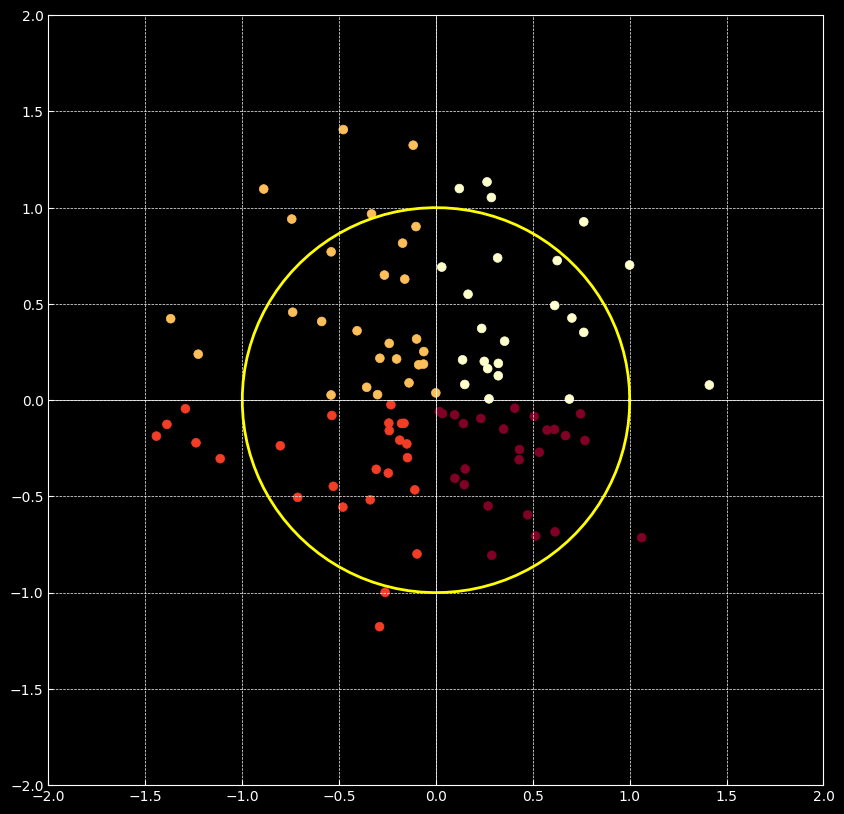

In [143]:
t = torch.linspace(0, 2*π, 100)
circle = torch.stack((torch.cos(t), torch.sin(t)), dim=1)

ax = plt.gca()
ax.plot(circle[:, 0], circle[:, 1], c='yellow')  # 'r-' sets the color of the line to red
plot_dots_w_lables(ax, d, l)  # Plot the dots with labels on the same axes

# Show the updated plot
plt.show()

## Making a simple Linear model (no activation function)

torch.Size([100, 2])